### Logistic problem
### $$ \min_x \frac{1}{M} \sum_{i=1}^{M}\log[1+\exp{(-b_ia_i^\top x)}]+\frac{\mu}{2}\vert\vert x\vert\vert^2 $$
### where $a_1, a_2, \cdots, a_m\in R^n$, $b_1, b_2, \cdots, b_m\in R$ and $\gamma>0$. We notice that the Lipschitz constant $L=$  

In [35]:
# First we import some useful packages. Don't import any other package.
import numpy as np
import matplotlib.pyplot as plt
import time as clock

In [36]:
from libsvm.svmutil import *

In [37]:
#import modules
import pandas as pd
import numpy as np

#read csv to pandas dataframe
mushrooms = pd.read_csv("mushrooms.csv")

#create dummy variables
mushrooms = pd.get_dummies(mushrooms)

#subset data into dependent and independent variables x,y
LABELS = ['class_e', 'class_p']
FEATURES = [a  for a in mushrooms.columns if a not in LABELS ]
y = mushrooms[LABELS[0]]
x= mushrooms[FEATURES]

mushrooms.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
A =x.to_numpy()

In [39]:
b = y.to_numpy()
b = b.reshape((len(b),1))

### Initialization of the model

In [40]:
mu = 0.5

In [41]:
np.random.seed(1)
x0 = 0.01*np.random.randn(117,1)

In [42]:
M = len(A)
#L = 2*np.trace(A@A.T)/M+ mu
L = 2*np.trace(A@A.T)/M+ mu
#L = 2*np.max(np.diag(A@A.T)) + mu
stepsize = 1/(2*L)#1/2L
H = 2
Model = {'A':A, 'b':b, 'mu':mu,'x':x0,'Lip':L,'H':2};
options= {'stepsize':stepsize}

### Algorithm

In [43]:
#Load 
from Mathtools import *
from gradNewton import *
from HBF import *
from CubicNewton import *
from CubicSR1 import *
from GradQN import *
from gd import *

In [44]:
L
Model['Lip'] = L

In [63]:
#test
maxiter = 1000#300;#500
check = 10;#10
tol = 0.0000000001;

# taping:
xs = [];
rs = [];
fs = [];
ts = [];
cols = [];
legs = [];

nams = [];

# colors for the image
COLSR1 = [(1,0,0,1), (1,0.5,0,1), (1,0,0.5,1), (0,0.5,0.5,1), (0.5,0.5,0,1) ]
COLBFGS =  [(0.3,0.7,0,1), (0.7,0.2,0.3,1), (0,0,0,1), (0.5,0,0.2,1), (0.2,0.2,0.7,1) ]

In [64]:
# turn algorithms to be run on or off
run_Cubic_Newton = 1;
run_grad_Newton = 1;
run_Cubic_SR1 = 1;

run_grad_SR1 = 1; #grad SR1 ad
run_HBF = 1
run_gd = 1
with open('starting_point.npy', 'rb') as f:
      x0= np.load(f)
# with open('logisSol.npy', 'rb') as f:
#      x0 = np.load(f)
np.random.seed(1)
Model['x'] =x0 #0*np.random.randn(len(A[0,:]),1)
compute_starting_point = False;


#TOl
tol = 1e-13
if compute_starting_point: # optimal solution is compyted using FISTA
    maxiter = 10;
    check = 10;
    Model['x'] = 0*np.random.randn(len(A[0,:]),1)
    run_fista = 0;
    run_grad_SR1_ad = 0; #grad SR1 ad
    run_gd = 0
    run_Cubic_Newton = 0;
    run_grad_Newton = 0;
    run_Cubic_SR1 = 0;

    run_grad_SR1 = 0; #grad SR1 ad
    run_HBF = 1
    run_gd = 0
    
    
    

In [65]:
#####################################################################
if run_Cubic_Newton:
    
    print('');
    print('********************************************************');
    print('***Cubic Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])
    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0.6,1));
    legs.append('Cubic Newton');
    nams.append('Cubic Newton');


********************************************************
***Cubic Newton **
***********
iter:10, funValue:0.481695,fun:0.481695
iter:20, funValue:0.481691,fun:0.481691
iter:30, funValue:0.481691,fun:0.481691
iter:40, funValue:0.481691,fun:0.481691
iter:50, funValue:0.481691,fun:0.481691
iter:60, funValue:0.481691,fun:0.481691
Tolerence value reached


In [66]:
#####################################################################
if run_grad_Newton:
    
    print('');
    print('********************************************************');
    print('***Grad Newton **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = grad_Newton(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.1,0.1,0,1));
    legs.append('Grad Newton');
    nams.append('Grad Newton');


********************************************************
***Grad Newton **
***********
iter:10, funValue:0.481700,fun:0.481700
iter:20, funValue:0.481691,fun:0.481691
iter:30, funValue:0.481691,fun:0.481691
iter:40, funValue:0.481691,fun:0.481691
iter:50, funValue:0.481691,fun:0.481691
iter:60, funValue:0.481691,fun:0.481691
Tolerence value reached


In [67]:
#####################################################################
if run_Cubic_SR1:
    
    print('');
    print('********************************************************');
    print('***Cubic SR1 **');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'correction':  True,
        
    }

   
    
    output = Cubic_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.8,0.5,0.6,1));
    legs.append('Cubic SR1 PQN');
    nams.append('Cubic SR1 PQN');


********************************************************
***Cubic SR1 **
***********
iter:10, funValue:0.481691,fun:0.481691
iter:20, funValue:0.481691,fun:0.481691
Tolerence value reached


In [68]:

#####################################################################
if run_grad_SR1:
    
    print('');
    print('********************************************************');
    print('***Gradient reg SR1 ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        
    }

   
    
    output = Grad_SR1(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_fun']);
    cols.append((0.8,0.1,0,1));
    legs.append('Grad SR1 PQN');
    nams.append('Grad SR1 PQN');


********************************************************
***Gradient reg SR1 ***
***********
*****number of iterations***
3
*****number of iterations***
4
*****number of iterations***
5
*****number of iterations***
6
*****number of iterations***
7
*****number of iterations***
8
*****number of iterations***
10
iter:10, funValue:0.484151,fun:0.484151
*****number of iterations***
12
*****number of iterations***
14
*****number of iterations***
18
iter:20, funValue:0.481691,fun:0.481691
iter:30, funValue:0.481691,fun:0.481691
iter:40, funValue:0.481691,fun:0.481691
Tolerence value reached
num_restart= 10


In [69]:
if run_HBF:
    
    print('');
    print('********************************************************');
    print('***Accelerated ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False,
    }

   
    
    output = HBF(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time']);
    
    fs.append(output['seq_obj']);
    
    cols.append((0.4,0.5,0,1));
    legs.append('HBF');
    nams.append('HBF');
    if compute_starting_point== True:
        np.save('starting_point.npy',xs[0])
        


********************************************************
***Accelerated ***
***********
iter:10, time:1731945173.119117, tau:0.073484,fun:0.484396
iter:20, time:1731945173.161350, tau:0.073484,fun:0.481992
iter:30, time:1731945173.197113, tau:0.073484,fun:0.481723
iter:40, time:1731945173.231493, tau:0.073484,fun:0.481694
iter:50, time:1731945173.281141, tau:0.073484,fun:0.481692
iter:60, time:1731945173.321925, tau:0.073484,fun:0.481691
iter:70, time:1731945173.356195, tau:0.073484,fun:0.481691
iter:80, time:1731945173.391101, tau:0.073484,fun:0.481691
iter:90, time:1731945173.425416, tau:0.073484,fun:0.481691
iter:100, time:1731945173.460264, tau:0.073484,fun:0.481691
iter:110, time:1731945173.507330, tau:0.073484,fun:0.481691
iter:120, time:1731945173.548761, tau:0.073484,fun:0.481691
iter:130, time:1731945173.583041, tau:0.073484,fun:0.481691
iter:140, time:1731945173.617450, tau:0.073484,fun:0.481691
iter:150, time:1731945173.651826, tau:0.073484,fun:0.481691
iter:160, time:17319

In [70]:
xs[0]

array([[1.58977760e-02],
       [1.33679619e-17],
       [5.54853235e-02],
       [1.02786194e-02],
       [1.19696997e-03],
       [6.76273500e-02],
       [5.34553170e-02],
       [1.13385109e-17],
       [4.57927047e-02],
       [5.12380173e-02],
       [2.06565759e-03],
       [1.43508238e-03],
       [2.01058058e-02],
       [3.54143476e-02],
       [4.60688075e-02],
       [2.34422005e-03],
       [7.00380019e-04],
       [7.00380019e-04],
       [2.71270293e-02],
       [1.45243286e-02],
       [5.88273703e-02],
       [9.16586687e-02],
       [1.44179326e-02],
       [8.69236459e-16],
       [1.60398399e-14],
       [1.44179326e-02],
       [1.58640578e-16],
       [1.21650174e-01],
       [9.68996721e-16],
       [4.77577175e-15],
       [4.77577175e-15],
       [9.47746094e-03],
       [1.41008578e-01],
       [1.03887125e-01],
       [4.65989144e-02],
       [1.39062234e-01],
       [1.14238047e-02],
       [1.45430292e-14],
       [4.12931923e-03],
       [9.49909605e-03],


In [71]:
if run_gd:
    
    print('');
    print('********************************************************');
    print('***Gradient  ***');
    print('***********');
    
    options = {
        'init':          x0,
        'stepsize':      stepsize,
        'storeResidual': True,
        'storePoints'  : False,
        'storeObjective':True,
        'storeTime'     : True,
        
        'storeBeta' : False
    }

   
    
    output = gd(Model, options, tol, maxiter, check);
    xs.append(output['sol']);
    rs.append(output['seq_res']);
    ts.append(output['seq_time'])

    fs.append(output['seq_obj']);
    cols.append((0.4,0.2,0,1));
    legs.append('GD');
    nams.append('GD');


********************************************************
***Gradient  ***
***********
iter:10, time:1731945177.395982, tau:0.011236,fun:0.501960
iter:20, time:1731945177.436950, tau:0.011236,fun:0.497644
iter:30, time:1731945177.472435, tau:0.011236,fun:0.494187
iter:40, time:1731945177.506793, tau:0.011236,fun:0.491436
iter:50, time:1731945177.553930, tau:0.011236,fun:0.489260
iter:60, time:1731945177.593923, tau:0.011236,fun:0.487549
iter:70, time:1731945177.628212, tau:0.011236,fun:0.486209
iter:80, time:1731945177.662380, tau:0.011236,fun:0.485166
iter:90, time:1731945177.696531, tau:0.011236,fun:0.484356
iter:100, time:1731945177.730816, tau:0.011236,fun:0.483730
iter:110, time:1731945177.776873, tau:0.011236,fun:0.483248
iter:120, time:1731945177.818678, tau:0.011236,fun:0.482878
iter:130, time:1731945177.852952, tau:0.011236,fun:0.482594
iter:140, time:1731945177.887200, tau:0.011236,fun:0.482377
iter:150, time:1731945177.921912, tau:0.011236,fun:0.482212
iter:160, time:1731945

In [72]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

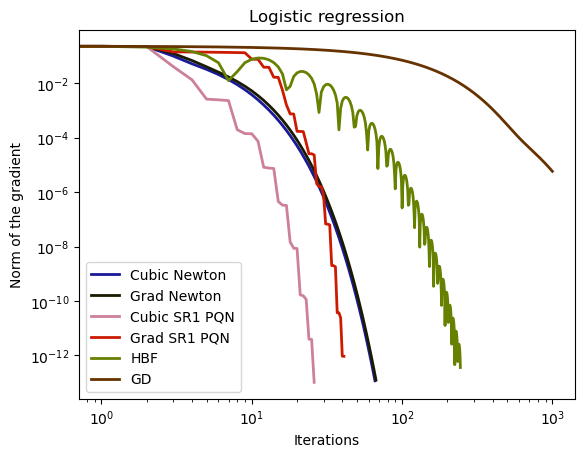

<Figure size 640x480 with 0 Axes>

In [73]:
#nalgs = len(rs);
nalgs = len(rs);

# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    iterations = np.arange(0,len(rs[i])-1,1)

    plt.plot(iterations, rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

#plt.xlabel('seq_time')
plt.xlabel('Iterations')
plt.ylabel('Norm of the gradient');
plt.title('Logistic regression')
plt.savefig('AllAlgorithmLogisticPQNOct16.pdf')

plt.show();
plt.draw();


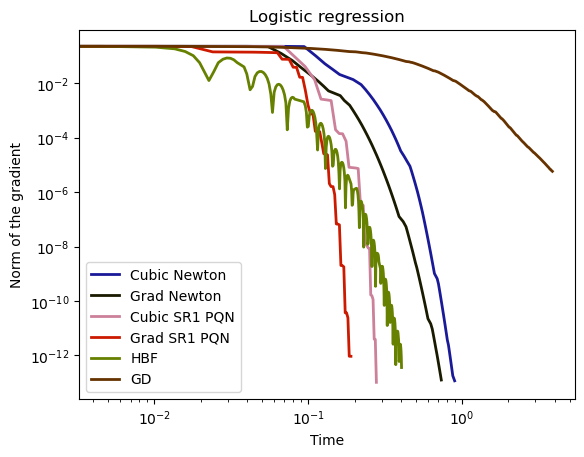

<Figure size 640x480 with 0 Axes>

In [74]:
#nalgs = len(rs);
nalgs = len(rs);
# plotting
fig1 = plt.figure();
for i in range(0,nalgs):
    plt.plot(ts[i][0:-1], rs[i][0:-1], '-', color=cols[i], linewidth=2);
    #plt.plot(iterations,fs[i][1:-1], '-', color=cols[i], linewidth=2);

plt.legend(legs);
plt.yscale('log');
plt.xscale('log');

plt.xlabel('Time')
# plt.xlabel('seq_iter')
plt.ylabel('Norm of the gradient');
plt.title('Logistic regression')
plt.savefig('AllAlgorithmLogisticPQNtimeOct16.pdf')

plt.show();
plt.draw();